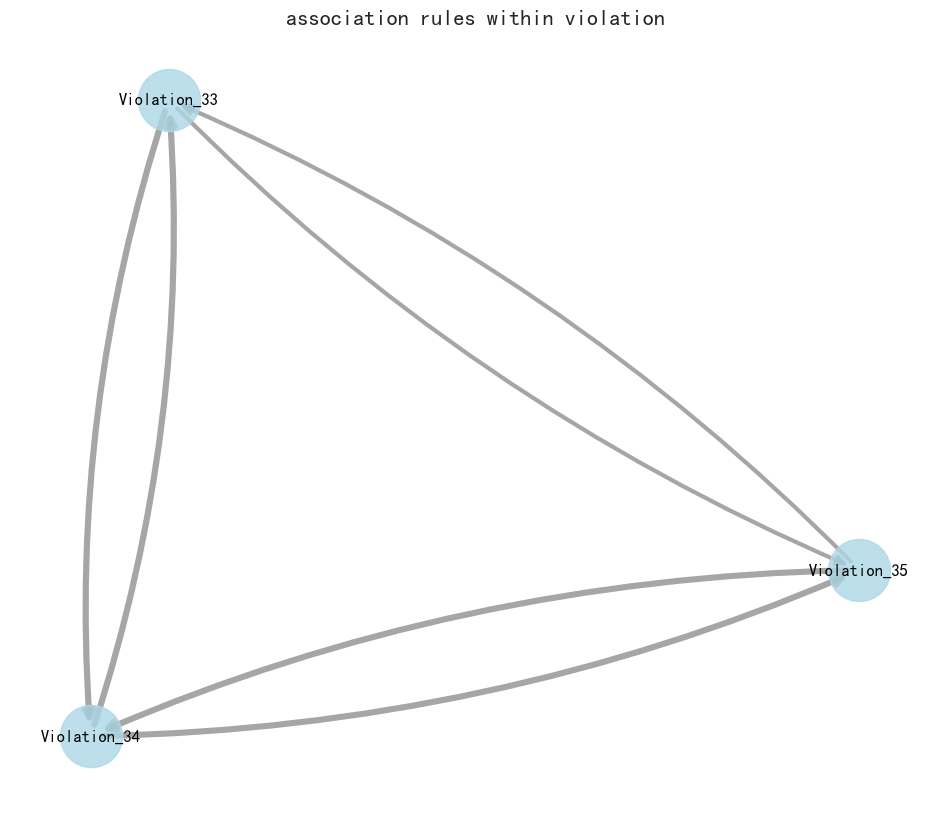

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# 创建关联规则数据
rules = [
    {"antecedents": ["Violation_33", "Violation_35"], "consequents": ["Violation_34"], "support": 0.102, "confidence": 0.779, "lift": 3.161},
    {"antecedents": ["Violation_34"], "consequents": ["Violation_33", "Violation_35"], "support": 0.102, "confidence": 0.416, "lift": 3.161},
    {"antecedents": ["Violation_33"], "consequents": ["Violation_34", "Violation_35"], "support": 0.102, "confidence": 0.448, "lift": 3.058},
    {"antecedents": ["Violation_34", "Violation_35"], "consequents": ["Violation_33"], "support": 0.102, "confidence": 0.700, "lift": 3.058},
    {"antecedents": ["Violation_33", "Violation_34"], "consequents": ["Violation_35"], "support": 0.102, "confidence": 0.673, "lift": 2.991},
    {"antecedents": ["Violation_35"], "consequents": ["Violation_33", "Violation_34"], "support": 0.102, "confidence": 0.455, "lift": 2.991},
    {"antecedents": ["Violation_33"], "consequents": ["Violation_34"], "support": 0.152, "confidence": 0.665, "lift": 2.700},
    {"antecedents": ["Violation_34"], "consequents": ["Violation_33"], "support": 0.152, "confidence": 0.618, "lift": 2.700},
    {"antecedents": ["Violation_34"], "consequents": ["Violation_35"], "support": 0.146, "confidence": 0.594, "lift": 2.640},
    {"antecedents": ["Violation_35"], "consequents": ["Violation_34"], "support": 0.146, "confidence": 0.651, "lift": 2.640}
]

# 将规则转换为DataFrame
df_rules = pd.DataFrame(rules)

# 1. 网络图可视化
plt.figure(figsize=(12, 10))
G = nx.DiGraph()

# 添加节点
unique_violations = set()
for rule in rules:
    for item in rule["antecedents"]:
        unique_violations.add(item)
    for item in rule["consequents"]:
        unique_violations.add(item)

for violation in unique_violations:
    G.add_node(violation)

# 添加边
for rule in rules:
    for antecedent in rule["antecedents"]:
        for consequent in rule["consequents"]:
            if G.has_edge(antecedent, consequent):
                G[antecedent][consequent]["weight"] += rule["lift"]
            else:
                G.add_edge(antecedent, consequent, weight=rule["lift"])

# 设置节点位置
pos = nx.spring_layout(G, seed=42)

# 绘制节点
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue', alpha=0.8)

# 绘制边，边的粗细表示lift值
edges = G.edges(data=True)
weights = [data['weight'] * 0.5 for _, _, data in edges]
nx.draw_networkx_edges(G, pos, width=weights, alpha=0.7, edge_color='gray',
                       connectionstyle='arc3,rad=0.1', arrowsize=15)

# 添加标签
nx.draw_networkx_labels(G, pos, font_size=12, font_family='SimHei')

plt.title('association rules within violation', fontsize=16, fontname='SimHei')
plt.axis('off')
plt.show()



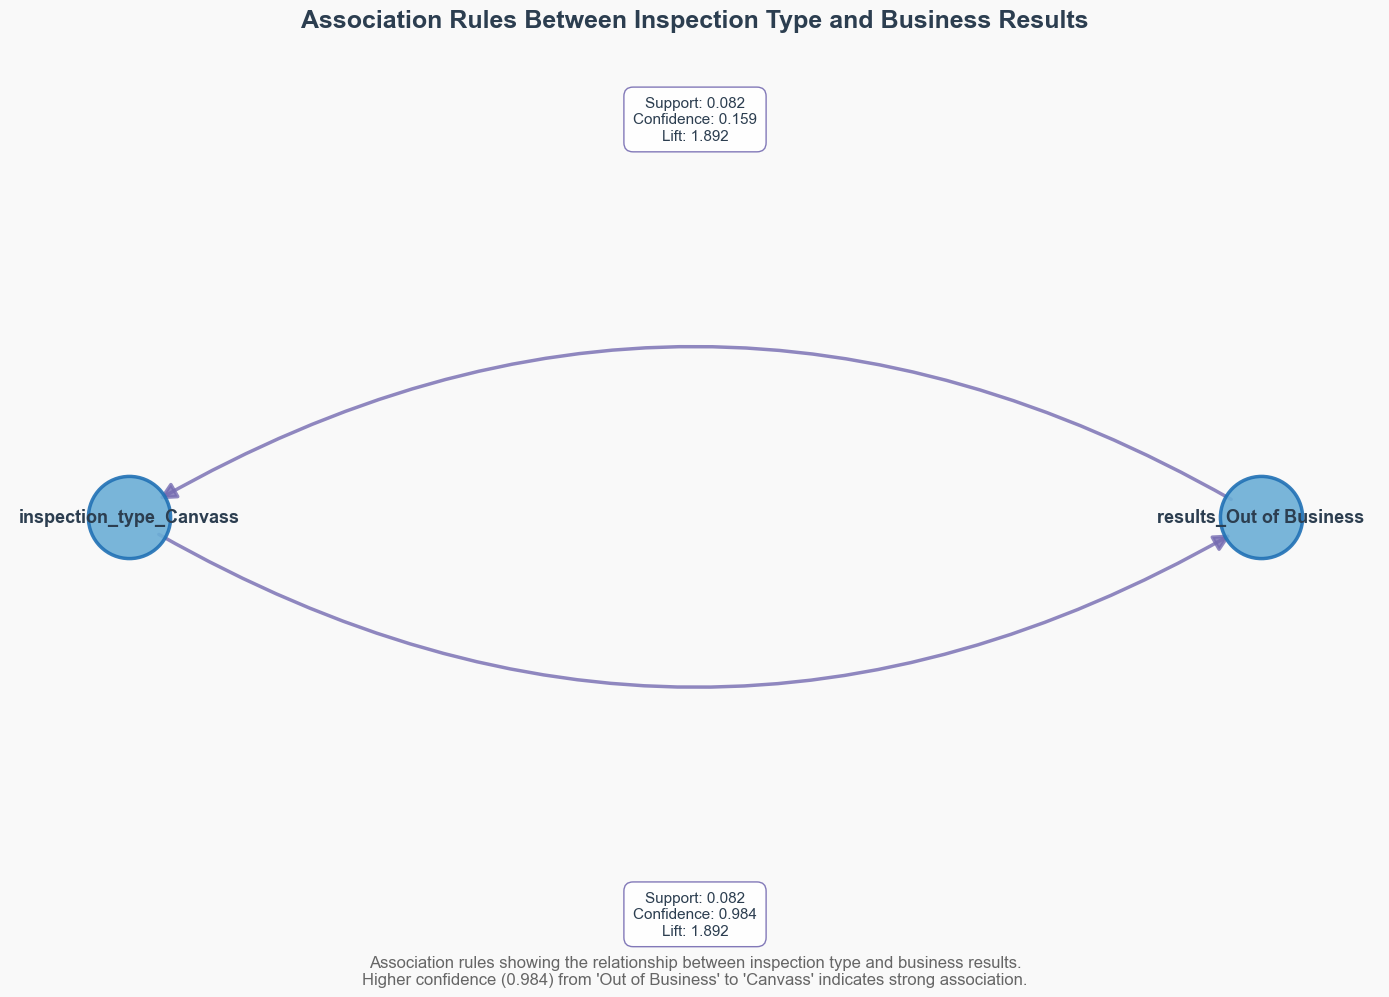

In [5]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap

# Create directed graph
G = nx.DiGraph()

# Add nodes
G.add_node("inspection_type_Canvass")
G.add_node("results_Out of Business")

# Add edges (association rules)
G.add_edge("inspection_type_Canvass", "results_Out of Business",
           support=0.082, confidence=0.159, lift=1.892)
G.add_edge("results_Out of Business", "inspection_type_Canvass",
           support=0.082, confidence=0.984, lift=1.892)

# Set node positions
pos = {
    "inspection_type_Canvass": (0, 0),
    "results_Out of Business": (1, 0)
}

plt.figure(figsize=(14, 10), facecolor='#f9f9f9')

# Create custom color map
node_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#6baed6', '#3182bd'])

# Draw nodes with gradient effect
for i, node in enumerate(G.nodes()):
    nx.draw_networkx_nodes(G, pos,
                           nodelist=[node],
                           node_size=3500,
                           node_color=[i/len(G.nodes())],
                           cmap=node_cmap,
                           edgecolors='#2171b5',
                           linewidths=2.5,
                           alpha=0.9)

# Draw edges with better styling
nx.draw_networkx_edges(G, pos, width=2.5, alpha=0.8, edge_color='#756bb1',
                       connectionstyle='arc3,rad=0.3', arrowsize=25,
                       arrowstyle='-|>', min_source_margin=25, min_target_margin=25)

# Add node labels with better styling
nx.draw_networkx_labels(G, pos, font_size=13, font_family='sans-serif',
                        font_weight='bold', font_color='#2c3e50')

# Add edge labels with better styling
edge_labels = {
    ("inspection_type_Canvass", "results_Out of Business"):
        f"Support: {G.edges[('inspection_type_Canvass', 'results_Out of Business')]['support']}\nConfidence: {G.edges[('inspection_type_Canvass', 'results_Out of Business')]['confidence']}\nLift: {G.edges[('inspection_type_Canvass', 'results_Out of Business')]['lift']}",

    ("results_Out of Business", "inspection_type_Canvass"):
        f"Support: {G.edges[('results_Out of Business', 'inspection_type_Canvass')]['support']}\nConfidence: {G.edges[('results_Out of Business', 'inspection_type_Canvass')]['confidence']}\nLift: {G.edges[('results_Out of Business', 'inspection_type_Canvass')]['lift']}"
}

for edge, label in edge_labels.items():
    x = (pos[edge[0]][0] + pos[edge[1]][0]) / 2
    y = (pos[edge[0]][1] + pos[edge[1]][1]) / 2

    if edge == ("inspection_type_Canvass", "results_Out of Business"):
        y += 0.2
    else:
        y -= 0.2

    plt.text(x, y, label, fontsize=11, ha='center', va='center',
             bbox=dict(boxstyle='round,pad=0.6', facecolor='white', edgecolor='#756bb1',
                       alpha=0.9),
             family='sans-serif', fontweight='medium', color='#2c3e50')

# Add title and beautify plot
plt.title('Association Rules Between Inspection Type and Business Results',
          fontsize=18, fontweight='bold', pad=20, color='#2c3e50', family='sans-serif')
plt.axis('off')

# Add gradient frame/background
ax = plt.gca()
ax.set_facecolor('#f9f9f9')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add description
plt.figtext(0.5, 0.01,
            "Association rules showing the relationship between inspection type and business results.\nHigher confidence (0.984) from 'Out of Business' to 'Canvass' indicates strong association.",
            ha='center', fontsize=12, color='#666666', family='sans-serif')

plt.tight_layout()
plt.show()

In [30]:
from data_preparation import *

food_dataset = pd.read_csv("Food_Inspections_20250216.csv",  dtype={'License #': str, 'Zip': str})
updated_food_dataset = food_dataset.copy()
# Apply function
updated_food_dataset = col_name_changer(updated_food_dataset)
updated_food_dataset = validate_and_convert_dtypes(updated_food_dataset)

##### DATA PROCESSING #####
updated_food_dataset = process_license_numbers(updated_food_dataset)
updated_food_dataset = clean_zip_data(updated_food_dataset).drop(columns=['zip','zip_valid'],axis=1).rename(columns={'zip_clean':'zip'})
updated_food_dataset['state'] = updated_food_dataset.apply(
    lambda row: row['state'] if pd.notna(row['state']) else get_zip_info(row['zip'],'state'),
    axis=1)
updated_food_dataset['city'] = updated_food_dataset.apply(
    lambda row: row['city'] if pd.notna(row['city']) else get_zip_info(row['zip'],'city'),
    axis=1)
updated_food_dataset = geocode_missing_coordinates(updated_food_dataset)
updated_food_dataset = risk_column_transformation(updated_food_dataset)
updated_food_dataset = standardize_name_columns(updated_food_dataset)
updated_food_dataset['aka_name'] = updated_food_dataset['aka_name'].fillna(updated_food_dataset['dba_name'])
updated_food_dataset = fix_city_name(updated_food_dataset)


In [31]:
updated_food_dataset.isnull().sum()

inspection_id          0
dba_name               0
aka_name               0
license_num           18
facility_type       5197
risk                   0
address                0
city                   0
state                  0
inspection_date        0
inspection_type        1
results                0
violations         79652
latitude             171
longitude            171
location             171
zip                   39
dtype: int64

In [28]:

fds_to_fix = [#derived from AFD, obmitted in this script
    "dba_name → facility_type",
    "address → zip",
    "location → zip",
    "address → city",
    "address,inspection_date → facility_type",
    "aka_name,inspection_date → location"
]
updated_food_dataset, stats = repair_dataset_based_on_fd(updated_food_dataset, fds_to_fix)



Starting data repair based on functional dependencies...

Analyzing functional dependency: dba_name → facility_type
  Found 1374 potential repairs

Analyzing functional dependency: address → zip
  Found 58 potential repairs

Analyzing functional dependency: location → zip
  Found 70 potential repairs

Analyzing functional dependency: address → city
  Found 10 potential repairs

Analyzing functional dependency: address,inspection_date → facility_type
  Found 4260 potential repairs

Analyzing functional dependency: aka_name,inspection_date → location
  Found 4275 potential repairs

Creating repaired dataset...
  Fixed: address,inspection_date → facility_type X=('1 N LA SALLE ST ', Timestamp('2010-12-02 00:00:00')), set NaN values to Grocery Store (affected 1 rows)
  Fixed: address,inspection_date → facility_type X=('10 E CHICAGO AVE ', Timestamp('2010-03-18 00:00:00')), set NaN values to Restaurant (affected 1 rows)
  Fixed: address,inspection_date → facility_type X=('100 N RIVERSIDE PLZ

In [29]:
updated_food_dataset.isnull().sum()

inspection_id          0
dba_name               0
aka_name               0
license_num           18
facility_type       2677
risk                   0
address                0
city                   0
state                  0
inspection_date        0
inspection_type        1
results                0
violations         79652
latitude             171
longitude            171
location             166
zip                   39
dtype: int64